In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize

In [2]:
# N=20取log bin的函数

def databin_20(lst):
    result = [[]]    
    length = len(lst)
    n = 0
    for i in range(length):
        result[-1].append(math.log(lst[i],10))
        n = n+1
        if n ==10:
            n = 0
            result.append([])
    result.pop()
    output=[]
    for j in range(len(result)):
        output.append(np.mean(result[j])) 
    return output

def databin_20_std(lst):
    result = [[]]
    length = len(lst)
    n = 0
    for i in range(length):
        result[-1].append(math.log(lst[i],10))
        n = n+1
        if n == 10:
            n = 0
            result.append([]) 
    result.pop()
    output=[]
    for j in range(len(result)):
        output.append(np.std(result[j]))
    return output

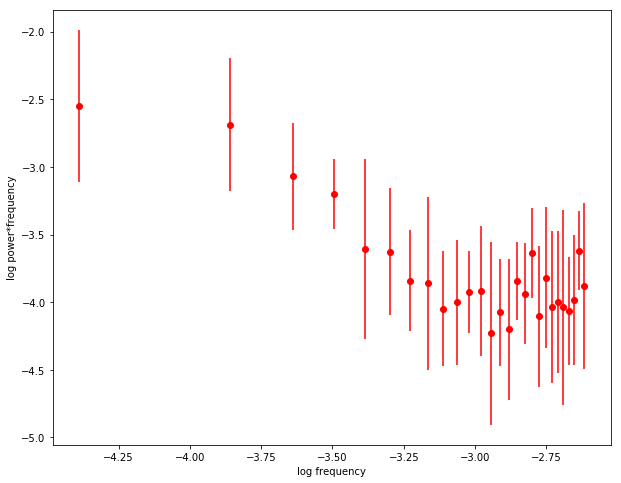

In [3]:
data06 = pd.read_csv("0.3_10_tb200.csv")
'''data06['RATE'] = data06['RATE'].fillna(data092['RATE'].mean())   # 平均值插值'''
data06['RATE'] = data06['RATE'].interpolate()


dt=200
counts_data = data06['RATE']
N=len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2
df = 1/(dt*N)
F_a = np.arange(1,nf+1)
F = [i*df for i in F_a]
F1 = F[0:int(nf)]
mean_x = np.mean(counts_data)
dft = fft(counts_data)
dft1= dft[1:int(nf)+1]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))



# 数据分bin
F1_binned_06 = databin_20(F1)
per_data_binned_06 = databin_20(per_data)
per_data_b_std_06 = databin_20_std(per_data)
p_times_f_data_b_06 = np.array(F1_binned_06)+np.array(per_data_binned_06)

'''
#减掉泊松噪声分bin
per_nobs = [i-2/mean_x for i in per_data]
F1_binned_06 = databin_20(F1)
per_data_binned_06 = databin_20(per_nobs)
per_data_b_std_06 = databin_20_std(per_nobs)
p_times_f_data_b_06 = np.array(F1_binned_06)+np.array(per_data_binned_06)
'''


plt.figure(figsize=(10,8))
plt.scatter(F1_binned_06, p_times_f_data_b_06, color="r", linewidth=1) 
plt.errorbar(F1_binned_06, p_times_f_data_b_06, yerr=per_data_b_std_06, fmt='.r')
plt.xlabel("log frequency")
plt.ylabel("log power*frequency")
plt.show()

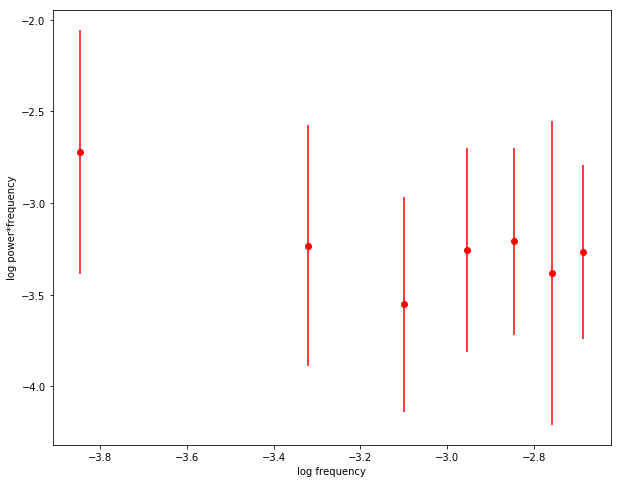

In [4]:
data00 = pd.read_csv("0.3_10_tb200(00-2).csv")  
data00['RATE'] = data00['RATE'].interpolate()


dt=200
counts_data = data00['RATE']
N=len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2
df = 1/(dt*N)
F_a = np.arange(1,nf+1)
F = [i*df for i in F_a]
F1 = F[0:int(nf)]
mean_x = np.mean(counts_data)
dft = fft(counts_data)
dft1= dft[1:int(nf)+1]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))



# 数据分bin
F1_binned_00 = databin_20(F1)
per_data_binned_00 = databin_20(per_data)
per_data_b_std_00 = databin_20_std(per_data)
p_times_f_data_b_00 = np.array(F1_binned_00)+np.array(per_data_binned_00)



plt.figure(figsize=(10,8))
plt.scatter(F1_binned_00, p_times_f_data_b_00, color="r", linewidth=1) 
plt.errorbar(F1_binned_00, p_times_f_data_b_00, yerr=per_data_b_std_00, fmt='.r')
plt.xlabel("log frequency")
plt.ylabel("log power*frequency")
plt.show()

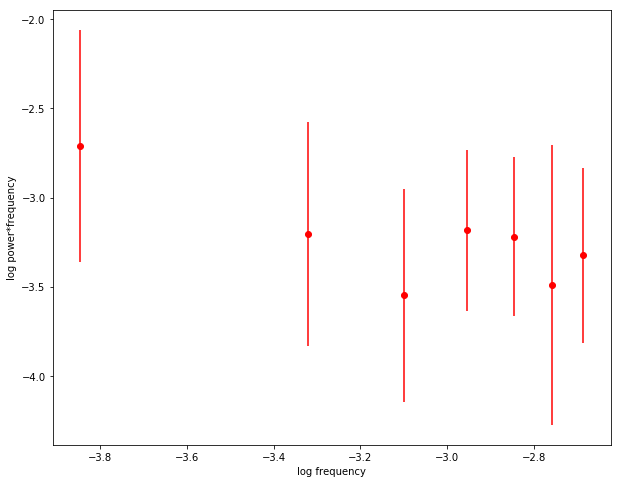

In [5]:
data00 = pd.read_csv("0.3_10_tb200(00).csv")  
data00['RATE'] = data00['RATE'].interpolate()


dt=200
counts_data = data00['RATE']
N=len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2
df = 1/(dt*N)
F_a = np.arange(1,nf+1)
F = [i*df for i in F_a]
F1 = F[0:int(nf)]
mean_x = np.mean(counts_data)
dft = fft(counts_data)
dft1= dft[1:int(nf)+1]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))



# 数据分bin
F1_binned_00 = databin_20(F1)
per_data_binned_00 = databin_20(per_data)
per_data_b_std_00 = databin_20_std(per_data)
p_times_f_data_b_00 = np.array(F1_binned_00)+np.array(per_data_binned_00)



plt.figure(figsize=(10,8))
plt.scatter(F1_binned_00, p_times_f_data_b_00, color="r", linewidth=1) 
plt.errorbar(F1_binned_00, p_times_f_data_b_00, yerr=per_data_b_std_00, fmt='.r')
plt.xlabel("log frequency")
plt.ylabel("log power*frequency")
plt.show()

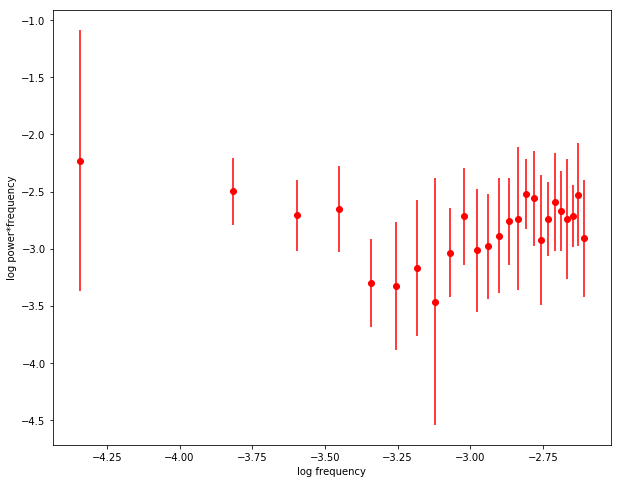

In [6]:
data091 = pd.read_csv("0.3_10_tb200(091).csv")  
data091['RATE'] = data091['RATE'].interpolate()


dt=200
counts_data = data091['RATE']
N=len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2
df = 1/(dt*N)
F_a = np.arange(1,nf+1)
F = [i*df for i in F_a]
F1 = F[0:int(nf)]
mean_x = np.mean(counts_data)
dft = fft(counts_data)
dft1= dft[1:int(nf)+1]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))



# 数据分bin
F1_binned_091 = databin_20(F1)
per_data_binned_091 = databin_20(per_data)
per_data_b_std_091 = databin_20_std(per_data)
p_times_f_data_b_091 = np.array(F1_binned_091)+np.array(per_data_binned_091)



plt.figure(figsize=(10,8))
plt.scatter(F1_binned_091, p_times_f_data_b_091, color="r", linewidth=1) 
plt.errorbar(F1_binned_091, p_times_f_data_b_091, yerr=per_data_b_std_091, fmt='.r')
plt.xlabel("log frequency")
plt.ylabel("log power*frequency")
plt.show()

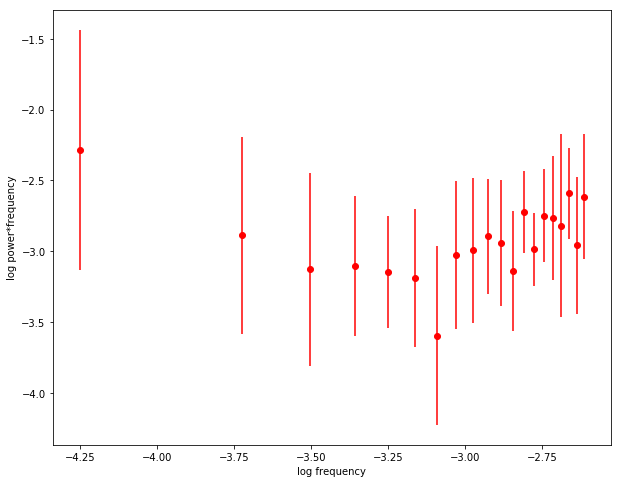

In [7]:
data092 = pd.read_csv("0.3_10_tb200(092).csv")  
data092['RATE'] = data092['RATE'].interpolate()


dt=200
counts_data = data092['RATE']
N=len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2
df = 1/(dt*N)
F_a = np.arange(1,nf+1)
F = [i*df for i in F_a]
F1 = F[0:int(nf)]
mean_x = np.mean(counts_data)
dft = fft(counts_data)
dft1= dft[1:int(nf)+1]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))



# 数据分bin
F1_binned_092 = databin_20(F1)
per_data_binned_092 = databin_20(per_data)
per_data_b_std_092 = databin_20_std(per_data)
p_times_f_data_b_092 = np.array(F1_binned_092)+np.array(per_data_binned_092)



plt.figure(figsize=(10,8))
plt.scatter(F1_binned_092, p_times_f_data_b_092, color="r", linewidth=1) 
plt.errorbar(F1_binned_092, p_times_f_data_b_092, yerr=per_data_b_std_092, fmt='.r')
plt.xlabel("log frequency")
plt.ylabel("log power*frequency")
plt.show()

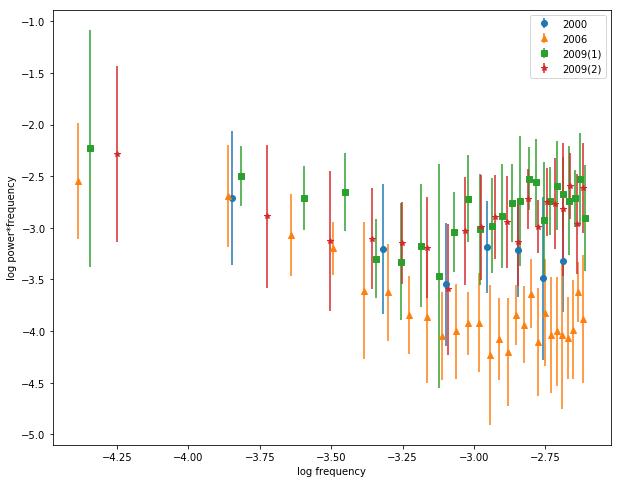

In [8]:
plt.figure(figsize=(10,8))
plt.errorbar(F1_binned_00, p_times_f_data_b_00, yerr=per_data_b_std_00, fmt='o', label='2000')
plt.errorbar(F1_binned_06, p_times_f_data_b_06, yerr=per_data_b_std_06, fmt='^', label='2006')
plt.errorbar(F1_binned_091, p_times_f_data_b_091, yerr=per_data_b_std_091, fmt='s',label='2009(1)')
plt.errorbar(F1_binned_092, p_times_f_data_b_092, yerr=per_data_b_std_092, fmt='*',label='2009(2)')
plt.xlabel("log frequency")
plt.ylabel("log power*frequency")
plt.legend()
plt.show()

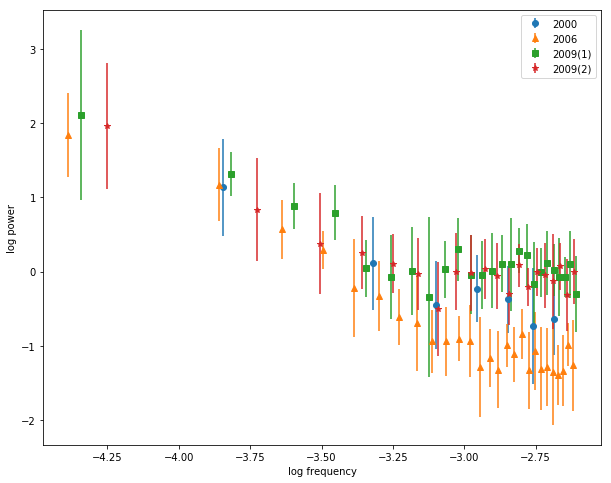

In [9]:
plt.figure(figsize=(10,8))
plt.errorbar(F1_binned_00, per_data_binned_00, yerr=per_data_b_std_00, fmt='o', label='2000')
plt.errorbar(F1_binned_06, per_data_binned_06, yerr=per_data_b_std_06, fmt='^', label='2006')
plt.errorbar(F1_binned_091, per_data_binned_091, yerr=per_data_b_std_091, fmt='s',label='2009(1)')
plt.errorbar(F1_binned_092, per_data_binned_092, yerr=per_data_b_std_092, fmt='*',label='2009(2)')
plt.xlabel("log frequency")
plt.ylabel("log power")
plt.legend()
plt.show()